<a href="https://colab.research.google.com/github/RaulFloresR/Mineria_de_Datos/blob/main/Notebook_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Equipo; 6

Grupo 2 Miércoles de 7:00pm-10:00pm

Nombres:

1687417 Francisco Javier Gonzales Olivares

1869524 Luis said Martinez Hernandez

1817336 Edmundo Isai Ibarra Cavazos

1838148 Raúl Flores Robles


1)

TITULO DE LA BASE DE DATOS:  "Consumo De Alcohol En Estudiantes"

URL: https://www.kaggle.com/uciml/student-alcohol-consumption

2) DESCRIPCIÓN DE LOS DATOS 

Estos datos son recolectados de una encuesta realizada a alumnos de preparatoria, donde se les preguntó acerca de la cantidad de alcohol que consumen, así como información personal y académica.

school: la escuela de los estudiantes. ('GP' - Gabriel Pereira o 'MS' - Mousinho da Silveira)

sex: el sexo de los estudiantes ('F' - female o 'M' - male)

age: la edad del estudiante.

address: El tipo de vivienda del estudiante ('U' - urbano o 'R' - rural)

famsize: Tamaño de la familia ('LE3' - less or equal to 3 or 'GT3' - greater than 3)

Pstatus - Indica si los padres viven juntos o no ('T' - living together or 'A' - apart)

Medu - Nivel de estudios de la madre (0 - nada, 1 - Educacion primaria (4to año), 2 – 5to a 9no, 3 – Educacion secundaria or 4 – Educacion superior)

Fedu - Nivel de estudios del padre (0 - nada, 1 - Educacion primaria (4to año), 2 – 5to a 9no, 3 – Educacion secundaria or 4 – Educacion superior)

Mjob - Trabajo de la madre

Fjob - Trabajo del padre

reason - Razon para escoger su escuela

guardian - Tutor

traveltime - Tiempo de viaje a la escuela (1 - <15 min., 2 - 15 a 30 min., 3 - 30 min. a una hora, o 4 - >1 hora)

studytime - Tiempo semanal de estudio (1 - <2 horas, 2 - 2 a 5 horas, 3 - 5 a 10 horas, o 4 - >10 horas)

failures - Numero de clases reprobadas

schoolsup - Apoyo educativo extra

famsup - Apoyo educativo de la familia

paid - clases extra pagadas para alguno de los temas de los cursos

activities - Actividades extra curriculares

nursery - Si atendió o no a una guarderia

higher - Si quiere o no educacion superior

internet - Acceso a internet en casa

romantic - Si se encuentra en una relacion romantica

famrel - calidad de las relaciones familiares (de 1 - muy mala a 5 - excelente)

freetime - Tiempo libre despues de la escuela (de 1 - muy poco a 5 - mucho)

goout - Salir con amigos (de 1 - muy poco a 5 - mucho)

Dalc - Consumo de alcohol entre semana (de 1 - muy poco a 5 - mucho)

Walc - Consumo de alcohol en fin de semana (de 1 - muy poco a 5 - mucho)

health - Estado actual de salud (de 1 - muy malo a 5 - muy bueno)

absences - Numero de faltas en la escuela

Las calificaciones son de 2 materias, matemáticas y portugués, y son G1, G2 y G3, con valores de 0 a 20 para las calificaciones de los 3 periodos.


3)Justificación Del Uso De datos

Esta base de datos es muy interesante por la cantidad diferente de variables con las que cuenta, lo que nos servirá para poder realizar un analisis y obtener conclusiones a partir de eso.

Estos datos ademas nos pueden ser utiles para entender los efectos que pueden tener el consumo del alcohol en edades tempranas.

4) Objetivos principales y Secundarios 

Principal:Identificar la relación entre el consumo de alcohol con el rendimiento académico de los estudiantes

Secundarios: 

-Analizar factores externos que puedan influir en el consumo de alcohol en los estudiantes

-Encontrar características en común de los alumnos que avanzaran a sus estudios superiores

LIMPIEZA DE DATOS 

In [1]:
import pandas as pd
import numpy as np
import json 
import csv
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules


In [3]:
from google.colab import files
files.upload()

Saving mat-nb.csv to mat-nb.csv


{'mat-nb.csv': b'sex,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,G1,G2,G3\r\n1,0,1,1,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,1,0,0,0\r\n1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0\r\n1,1,0,0,0,0,1,1,0,1,0,1,1,1,0,1,0,0,0,0,1,0,0,0\r\n1,1,1,0,0,1,0,0,1,1,1,1,1,1,1,0,0,0,0,0,1,1,1,1\r\n1,1,0,0,0,0,0,0,1,1,0,1,1,0,0,1,0,0,0,0,1,0,0,0\r\n0,1,1,0,0,0,0,0,1,1,1,1,1,1,0,1,1,0,0,0,1,1,1,1\r\n0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,1,0,0,1,0,0,0\r\n1,0,1,1,0,0,0,1,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0\r\n0,0,0,0,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,1,1,1\r\n0,1,0,1,0,0,0,0,1,1,1,1,1,1,0,1,1,0,0,0,1,1,1,1\r\n1,1,1,1,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0\r\n1,1,0,0,1,1,0,0,1,0,1,1,1,1,0,1,0,0,0,0,1,0,0,0\r\n0,1,1,1,0,0,0,0,1,1,1,1,1,1,0,1,0,0,0,0,1,1,1,1\r\n0,1,1,0,0,0,0,0,1,1,0,1,1,1,0,1,1,0,0,0,1,0,0,0\r\n0,0,0,0,0,1,0,0,1,0,0,1,1,1,1,1,1,0,0,0,1,1,1,1\r\n1,1,1,1,0,0,0,0,1,0,0,1,1,1,0,1,1,1,0,0,0,1,1,1\r

VISUALIZACIÓN DE DATOS

In [ ]:
df=pd.read_csv("student-mat.csv")
print(df) 
print(df.shape) 
print(df.head) 
print(df.tail)
print(df.columns)

    school sex  age address famsize Pstatus  ...  Walc  health absences  G1  G2  G3
0       GP   F   18       U     GT3       A  ...     1       3        6   5   6   6
1       GP   F   17       U     GT3       T  ...     1       3        4   5   5   6
2       GP   F   15       U     LE3       T  ...     3       3       10   7   8  10
3       GP   F   15       U     GT3       T  ...     1       5        2  15  14  15
4       GP   F   16       U     GT3       T  ...     2       5        4   6  10  10
..     ...  ..  ...     ...     ...     ...  ...   ...     ...      ...  ..  ..  ..
390     MS   M   20       U     LE3       A  ...     5       4       11   9   9   9
391     MS   M   17       U     LE3       T  ...     4       2        3  14  16  16
392     MS   M   21       R     GT3       T  ...     3       3        3  10   8   7
393     MS   M   18       R     LE3       T  ...     4       5        0  11  12  10
394     MS   M   19       U     LE3       T  ...     3       5        5   8 

En la primera columna menciona que estudiantes son, en la segunda es el sexo del estudiante, la siguiente es la edad, la siguiente es la direccion del estudiante8rural o urbano), la siguiente cuanta fmailia tiene si menos que 3 o mayor que 3, la siguiente es si sus padres estan juntos o separados,la siguiente es un rango en que la mama estudio, el siguiente es el mismo rango pero del padre de familia, la siguiente en que trabaja la mama y la ultima columna es en que trabaja el papa

Cambiamos el nombre a las columnas

    school sexo  edad Direccion  ... Faltas Grado 1  Grado 2  Calificación final
0       GP    F    18         U  ...      6       5        6                   6
1       GP    F    17         U  ...      4       5        5                   6
2       GP    F    15         U  ...     10       7        8                  10
3       GP    F    15         U  ...      2      15       14                  15
4       GP    F    16         U  ...      4       6       10                  10
..     ...  ...   ...       ...  ...    ...     ...      ...                 ...
390     MS    M    20         U  ...     11       9        9                   9
391     MS    M    17         U  ...      3      14       16                  16
392     MS    M    21         R  ...      3      10        8                   7
393     MS    M    18         R  ...      0      11       12                  10
394     MS    M    19         U  ...      5       8        9                   9

[395 rows x 33 columns]


In [ ]:
students_filepath="student-mat.csv"
sd=pd.read_csv(students_filepath)

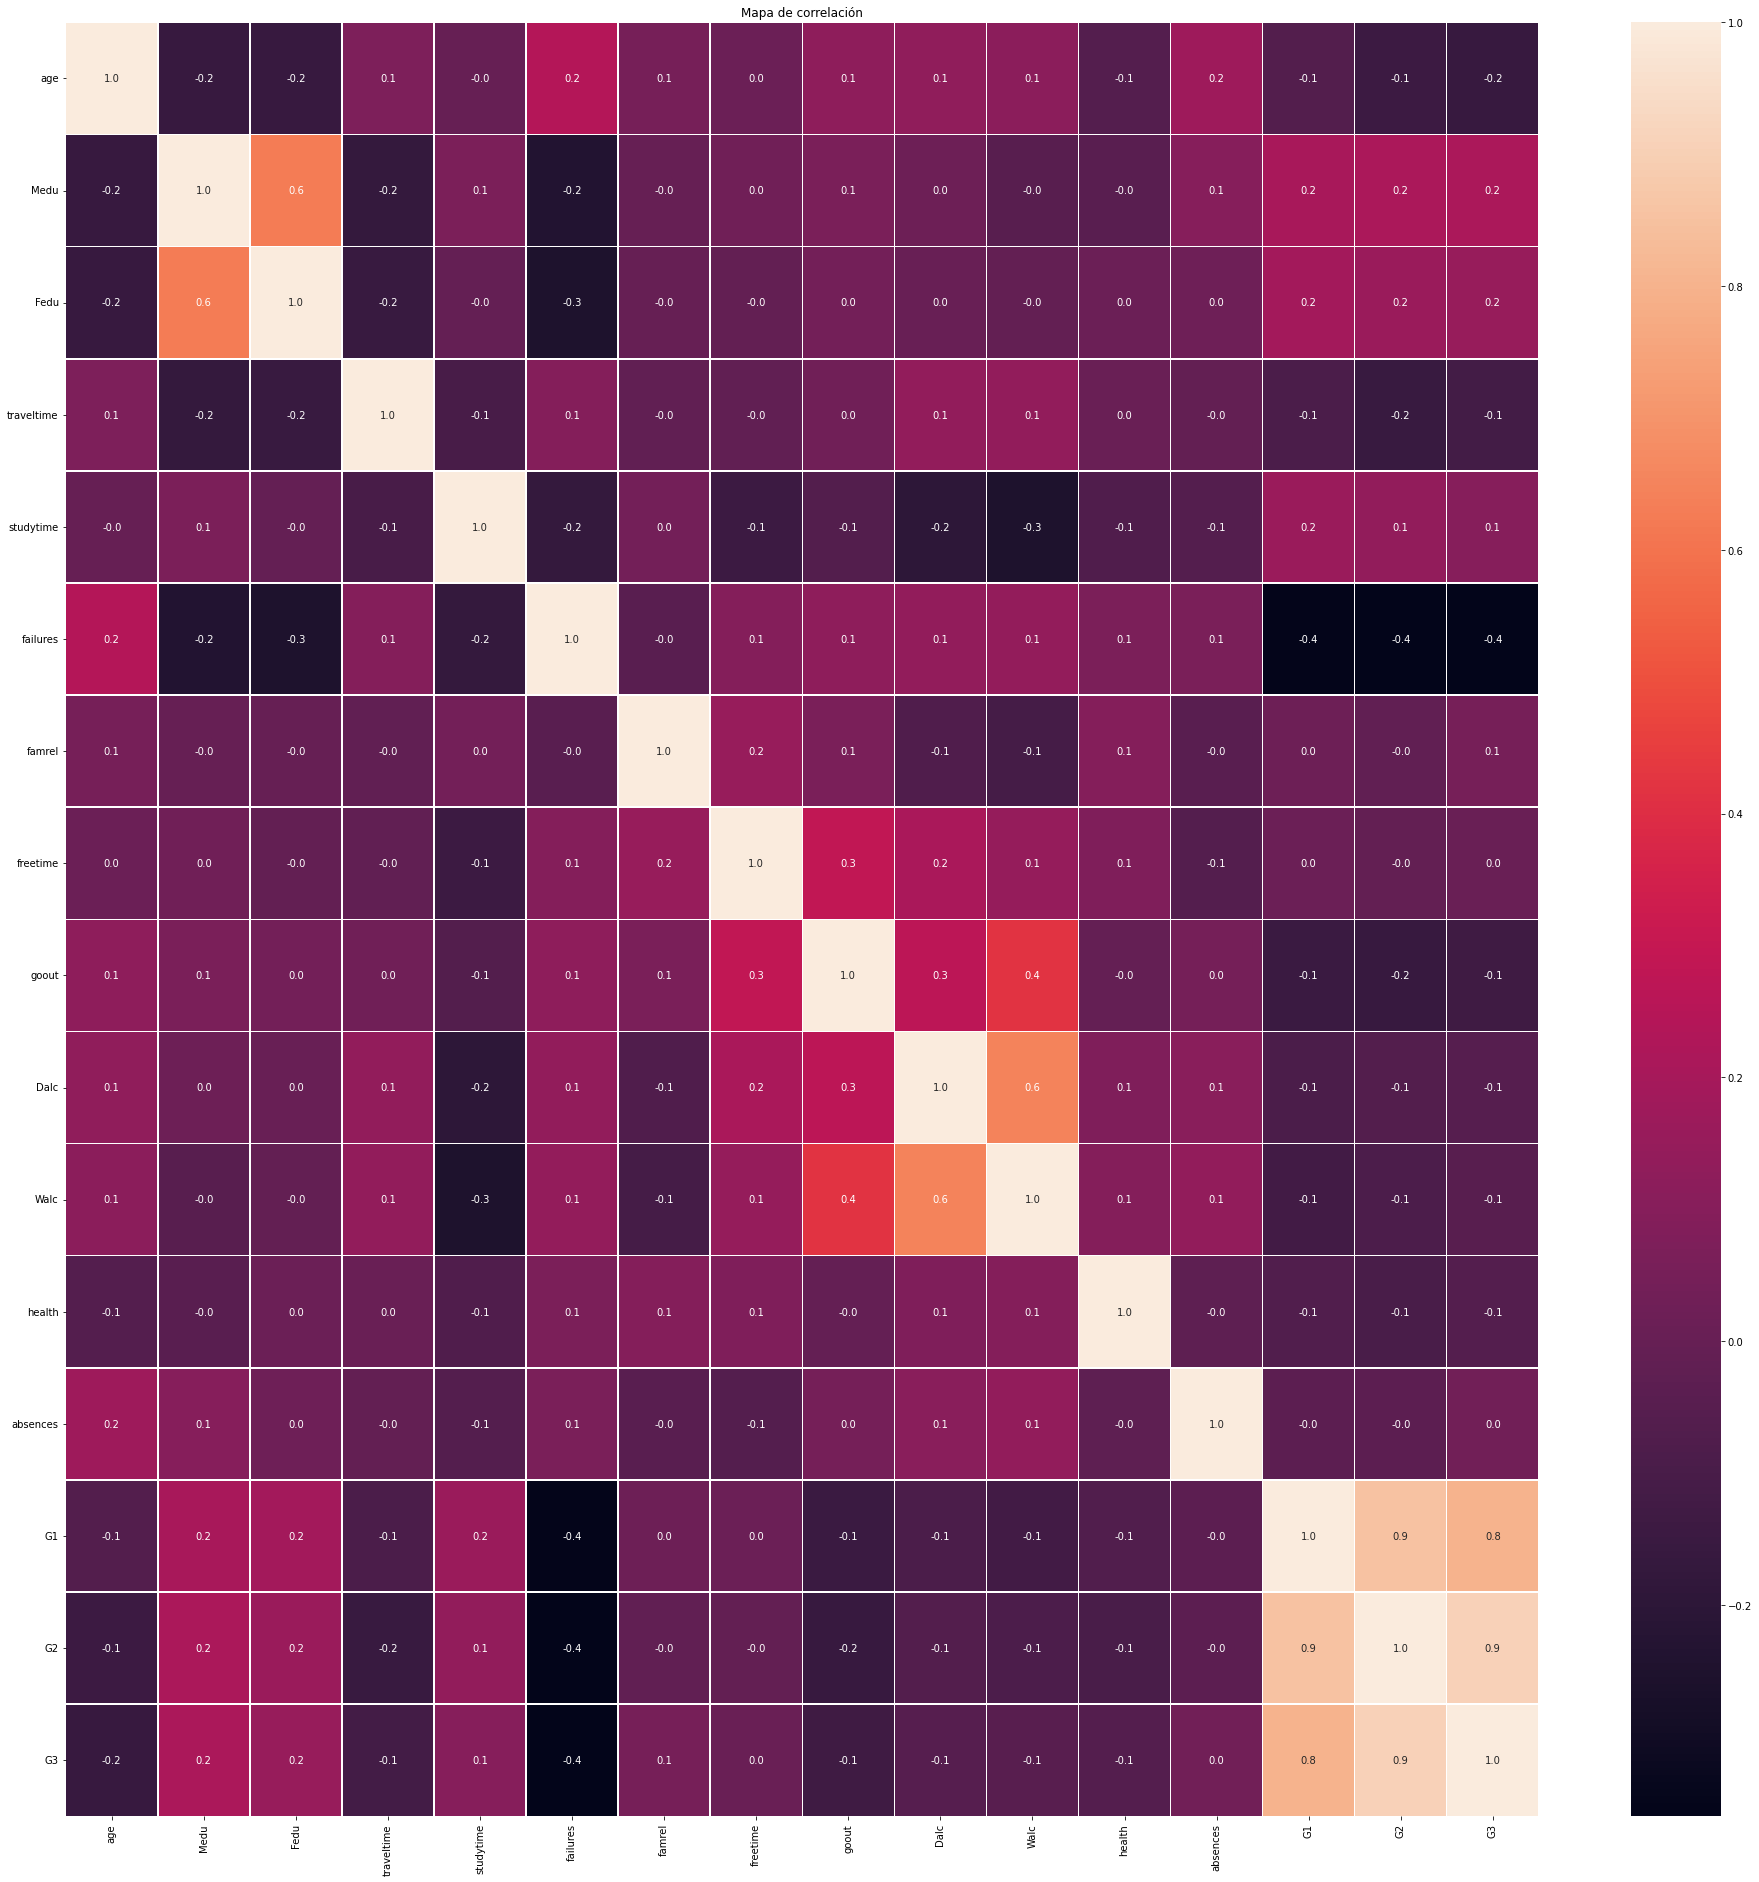

In [ ]:
f,ax=plt.subplots(figsize = (33,33))
sns.heatmap(sd.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Mapa de correlación')
plt.savefig('graph.png')
plt.show()

Podemos observar, que ninguana de las columnas tiene una correlacion significativa con otra ellas, a excepción de las ultimas tres, donde se hace referencia a las calificaiones de los alumnos. Dicho lo anterior, podemos elimnar algunas columnas sin relevancia.

In [ ]:
sd=sd.drop('Medu',axis=1)
sd=sd.drop('Fedu',axis=1)
sd=sd.drop('famrel',axis=1)

Renombramos las columnas

In [ ]:
sd=sd.rename(columns = {'school':'Escuela'})
sd=sd.rename(columns = {'sex':'Sexo'})
sd=sd.rename(columns = {'age':'Edad'})
sd=sd.rename(columns = {'address':'Direccion'})
sd=sd.rename(columns = {'famsize':'Tamaño de la familia'})
sd=sd.rename(columns = {'Pstatus':'Estado de convivencia de los padres'})
sd=sd.rename(columns = {'Mjob':'Trabajo de la madre'})
sd=sd.rename(columns = {'Fjob':'Trabajo del padre'})
sd=sd.rename(columns = {'reason':'Razón para elegir esta escuela'})
sd=sd.rename(columns = {'guardian':'Tutor '})
sd=sd.rename(columns = {'traveltime':'Tiempo de viaje'})
sd=sd.rename(columns = {'studytime':'Tiempo de estudio'})
sd=sd.rename(columns = {'failures':'Número de fallos'})
sd=sd.rename(columns = {'schoolsup':'Apoyo'})
sd=sd.rename(columns = {'famsup':'Apoyo educativo familiar'})
sd=sd.rename(columns = {'paid':'Clases extra'})
sd=sd.rename(columns = {'activities':'Actividades extracurriculares'})
sd=sd.rename(columns = {'nursery':'Guardería asistida'})
sd=sd.rename(columns = {'higher':'Quiere cursar estudios superiores'})
sd=sd.rename(columns = {'freetime':'Tiempo libre'})
sd=sd.rename(columns = {'goout':'Salir con amigos'})
sd=sd.rename(columns = {'Dalc':'Consumo de alcohol entre semana'})
sd=sd.rename(columns = {'Walc':'Consumo de alcohol durante el fin de semana'})
sd=sd.rename(columns = {'health':'Estado de salud actual'})
sd=sd.rename(columns = {'absences':'Número de ausencias'})

sd.head()

,Escuela,Sexo,Edad,Direccion,Tamaño de la familia,Estado de convivencia de los padres,Trabajo de la madre,Trabajo del padre,Razón para elegir esta escuela,Tutor,Tiempo de viaje,Tiempo de estudio,Número de fallos,Apoyo,Apoyo educativo familiar,Clases extra,Actividades extracurriculares,Guardería asistida,Quiere cursar estudios superiores,internet,romantic,Tiempo libre,Salir con amigos,Consumo de alcohol en la jornada laboral,Consumo de alcohol durante el fin de semana,Estado de salud actual,Número de ausencias,G1,G2,G3
0,GP,F,18,U,GT3,A,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,3,2,1,2,5,4,6,10,10


2) Estadistica Basica De Datos

In [ ]:
sd['Direccion'].describe()

count     395
unique      2
top         U
freq      307
Name: Direccion, dtype: object

In [ ]:
sd['Tiempo de estudio'].mean()

2.0354430379746837

En promedio, los alumnos estududian 2 horas a la semana.

In [ ]:
sd['Número de ausencias'].median()

4.0

La mayor parte de los alumnos faltan al menos 4 veces por semana.

In [ ]:
sd['G1'].describe()

count    395.000000
mean      10.908861
std        3.319195
min        3.000000
25%        8.000000
50%       11.000000
75%       13.000000
max       19.000000
Name: G1, dtype: float64

In [ ]:
sd['G2'].describe()

count    395.000000
mean      10.713924
std        3.761505
min        0.000000
25%        9.000000
50%       11.000000
75%       13.000000
max       19.000000
Name: G2, dtype: float64

In [ ]:
sd['G3'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

Podemos ver, que en los tres periodos, la calificacion media es de 10 aproximadamente, y almenos un alumno alcanza la calificacion de 19.

3:Graficas

In [ ]:
students_filepath="student-mat.csv"
student_data=pd.read_csv(students_filepath)
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


Text(0, 0.5, 'Consumo de alcohol entre semana')

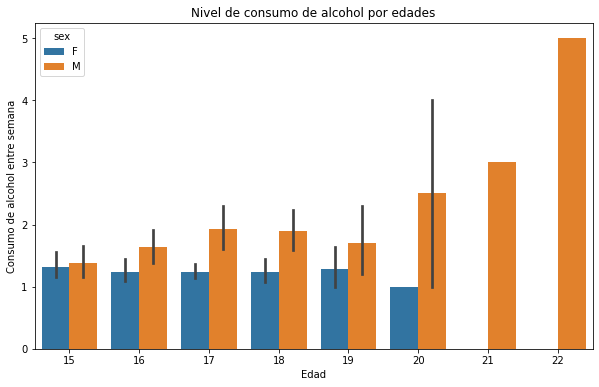

In [ ]:
#Grafica 1
plt.figure(figsize=(10,6))
plt.title("Nivel de consumo de alcohol por edades")
sns.barplot(x=student_data['age'],y=student_data['Dalc'],hue=student_data['sex'])
sns.set_style("dark")
plt.xlabel("Edad")
plt.ylabel("Consumo de alcohol entre semana")

En la primera grafica de barras podemos observar que conforme va pasando la edad los alumnos va aummentando mas el nivel de frecuencia con el que los alumnos toman entre fin de semana

Observación: La encuesta tomada fue sobre alumnos de nivel preparatoria de 15 a 20 años, pero se encuentran 2 datos atipicos de 21 y 22 años, es decir  outliers

In [ ]:
#Grafica 2
# Ruta Para leer archivo
insurance_filepath = "student-mat.csv"

# leer el archivo en una variable insurance_data
insurance_data = pd.read_csv(insurance_filepath)

In [ ]:
#Confirmar los datos imprimiendo los primeros 5 
insurance_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


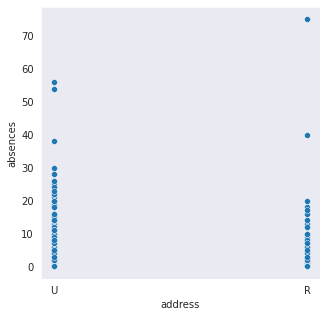

In [ ]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=insurance_data['address'], y=insurance_data['absences'])

En esta grafica De densidad podemos observar que la relacion que hay entre los alumnos que son de sona rural y urbana junto con sus faltas y podemos ver que la zona urbana es la que tine mayores numeros de faltas a comparación de los que viven en zonas rurales

In [ ]:
#Grafica 3
# Path of the file to read
iris_filepath = "student-mat.csv"
# Read the file into a variable iris_data
iris_data = pd.read_csv(iris_filepath, index_col="age")
# Print the first 5 rows of the data
iris_data.head()

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
18,GP,F,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
17,GP,F,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
15,GP,F,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
15,GP,F,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
16,GP,F,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


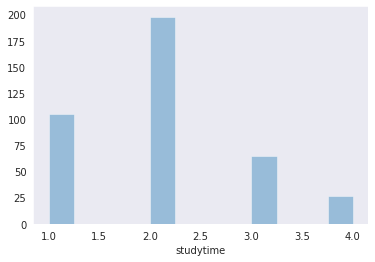

In [ ]:
# Histogram 
sns.distplot(a=iris_data['studytime'], kde=False)


Como podemos observar en el histogrma mencionado, vemos que el mas respondido fue la opcion 2 que quiere decir que los alumnos estudian de 2 a 5 horas por semana, esto es muy poco si se considera que al dia se estudiaria al rededor de 1 hora diaria excepto fines de semana

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


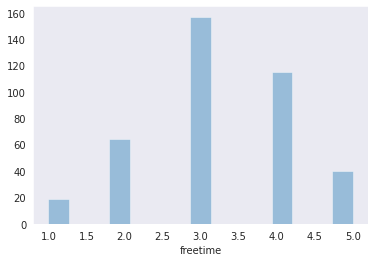

In [ ]:
#Grafica 4
# Histogram 
sns.distplot(a=iris_data['freetime'], kde=False)

Como podemos observar el tiempo promedio de los estudiantes despues de la escuela, es un tiempo considerable para poder estudiar ya que del 1 al 5 es que tanto tiempo libre se tiene el tiempo despues de la escuela y ma mayoria es del 3 al 5 que esto quiere decir que si se tiene una cantidad considerable de tiempo libre al dia

In [ ]:
#Grafica 5
students_filepath="student-mat.csv"
student_data=pd.read_csv(students_filepath)
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


Text(0, 0.5, 'Consumo de alcohol entre semana')

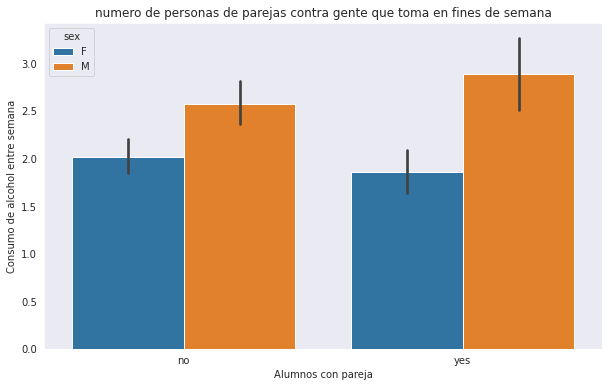

In [ ]:
plt.figure(figsize=(10,6))
plt.title("numero de personas de parejas contra gente que toma en fines de semana")
sns.barplot(x=student_data['romantic'],y=student_data['Walc'],hue=student_data['sex'])
sns.set_style("dark")
plt.xlabel("Alumnos con pareja")
plt.ylabel("Consumo de alcohol entre semana")


Como podemos observar, nosotros pensabamos que al tener pareja, la relación haria que bajaran el uso de alcohol los fines de semana, pero al parecer al tener pareja, el deseo de ingerierir aumento un poco mas que las perosnas que no tienen pareja

Text(0, 0.5, 'Relacion con sus padres')

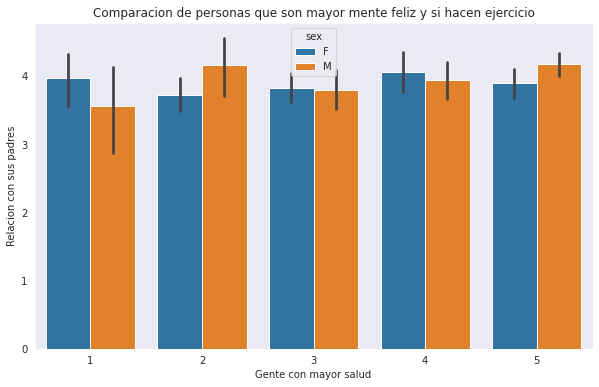

In [ ]:
#Grafica 6
plt.figure(figsize=(10,6))
plt.title("Comparacion de personas que son mayor mente feliz y si hacen ejercicio")
sns.barplot(x=student_data['health'],y=student_data['famrel'],hue=student_data['sex'])
sns.set_style("dark")
plt.xlabel("Gente con mayor salud")
plt.ylabel("Relacion con sus padres")

Podemos observar que la gente que goza de mayor o menor salud que otros no necesariamente depende de la relacion con sus padre, donde 0 es muy mala y 5 es excelente, de lo cual podemos observar que no depende de la relación con los padres para decidir si ingerir alcohol o no

4 TECNICA DE MINERIA 

La técnica que utilizamos es la de Reglas de Asociación, la cual escogimos porque ésta nos permitirá encontrar relaciones entre los diferentes datos que utilizamos y así obtener conclusiones de acuerdo a eso. 

In [4]:
df=pd.read_csv("mat-nb.csv")
df.head()

,sex,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,G1,G2,G3
0,1,0,1,1,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,1,0,0,0
1,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0
2,1,1,0,0,0,0,1,1,0,1,0,1,1,1,0,1,0,0,0,0,1,0,0,0
3,1,1,1,0,0,1,0,0,1,1,1,1,1,1,1,0,0,0,0,0,1,1,1,1
4,1,1,0,0,0,0,0,0,1,1,0,1,1,0,0,1,0,0,0,0,1,0,0,0


Cargamos la tabla y para poder tener un mejor codigo cambiamos los datos de "si" por 1 y "no" por 0. En la columa de sexo 1 representan mujeres y 0 representan hombres. En cuanto a los valores de frecuencia del 1-5 el "0" representa del 1-3, el "1" representa 4-5 a expecion de la columna de salud los cuales son representados por "0" los valores que eran 1-2 y los mayores son representatos por "1".


In [5]:
df = apriori(df, min_support = 0.5, use_colnames = True)
df

,support,itemsets
0,0.526582,(sex)
1,0.896203,(Pstatus)
2,0.612658,(famsup)
3,0.508861,(activities)
4,0.794937,(nursery)
5,0.949367,(higher)
6,0.832911,(internet)
7,0.762025,(famrel)
8,0.767089,(health)
9,0.516456,"(sex, higher)"


Establecimos un valor umbral para el valor de soporte y calculamos el valor de soporte. Nuestro soporte minimo es de 50%.

In [6]:
df_ar = association_rules(df, metric = "confidence", min_threshold = 0.85)
df_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(sex),(higher),0.526582,0.949367,0.516456,0.980769,1.033077,0.016536,2.632911
1,(famsup),(Pstatus),0.612658,0.896203,0.551899,0.900826,1.005159,0.002833,1.046624
2,(nursery),(Pstatus),0.794937,0.896203,0.701266,0.882166,0.984337,-0.011158,0.880876
3,(higher),(Pstatus),0.949367,0.896203,0.848101,0.893333,0.996798,-0.002724,0.973101
4,(Pstatus),(higher),0.896203,0.949367,0.848101,0.946328,0.996798,-0.002724,0.943371
5,(internet),(Pstatus),0.832911,0.896203,0.754430,0.905775,1.010681,0.007973,1.101592
6,(famrel),(Pstatus),0.762025,0.896203,0.686076,0.900332,1.004608,0.003147,1.041435
7,(health),(Pstatus),0.767089,0.896203,0.691139,0.900990,1.005342,0.003672,1.048354
8,(famsup),(higher),0.612658,0.949367,0.592405,0.966942,1.018512,0.010768,1.531646
9,(famsup),(internet),0.612658,0.832911,0.529114,0.863636,1.036889,0.018824,1.225316


Usamos la regla de asociación con la métrica de confidence y un umbral minimo de 85%, el cual nos dice que los antecedentes suceden y la columna consequentes tiene un 85% de probabilidad de pasar. Utilizamos valores altos para reducir la cantidad de valores a analizar.

#Conclusión:
La técnica de reglas de asociación demostró ser util para encontrar la relación entre diversas columnas de nuestra base de datos, ya que con ésta podemos describir la relación que existe entre los factores externos que pueden contribuir en el consumo del alcohol en los estudiantes, asi como en su calidad de vida. Las métricas que tomamos terminaron siendo valores arbitrarios que nos sirvieron para tener un numero mas reducido de valores a analizar, por lo que podemos hacer un analisis menos estricto para encontrar mas información de utilidad. Además, podemos modificar los datos en el futuro, como por ejemplo cambiar los valores binarios que se le asignó al sexo, para que los resultados nos reflejen la cantidad de hombres.